In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model_mlp import MLP


### Preparation ####

# set random seed
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)

# set precision and device
torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

### load dataset ###

inputs_train = np.load('./data/train_data_tensor.npy')
labels_train = np.load('./data/train_labels_tensor.npy')
inputs_test = np.load('./data/test_data_tensor.npy')
labels_test = np.load('./data/test_labels_tensor.npy')

inputs_train = torch.tensor(inputs_train, dtype=torch.float64, requires_grad=True).to(device)
labels_train = torch.tensor(labels_train, dtype=torch.float64, requires_grad=True).to(device)
inputs_test = torch.tensor(inputs_test, dtype=torch.float64, requires_grad=True).to(device)
labels_test = torch.tensor(labels_test, dtype=torch.float64, requires_grad=True).to(device)


def l1(model):
    l1_reg = torch.tensor(0.).to(device)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return l1_reg

shp = [1, 3, 1] 
model = MLP(shp=shp).to(device)

### Training ###

optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.0)
steps = 50000
log = 2000
lamb = 0e-4


train_accuracies = []
test_accuracies = []

train_losses=[]
test_losses=[]
for step in range(steps):
    optimizer.zero_grad()
    
    pred_train = model(inputs_train)
    loss_train = torch.mean((pred_train-labels_train)**2)

    acc_train = torch.mean((abs(pred_train - labels_train) < 0.01).long().float())
    pred_test = model(inputs_test)
    loss_test = torch.mean((pred_test-labels_test)**2)
    acc_test = torch.mean((abs(pred_test - labels_test) < 0.01).long().float())

    reg = l1(model)
    loss = loss_train + lamb * reg

    loss.backward()
    optimizer.step()
    
    if step % log == 0:
        cool_weight_plot(model,step)
        print("step = %d | train loss: %.2e | test loss %.2e | train acc: %.2e | test acc: %.2e | reg: %.2e "%(step, loss_train.cpu().detach().numpy(), loss_test.cpu().detach().numpy(), acc_train.cpu().detach().numpy(), acc_test.cpu().detach().numpy(), reg.cpu().detach().numpy()))
        train_accuracies.append(acc_train.cpu().detach().numpy())
        test_accuracies.append(acc_test.cpu().detach().numpy())

        train_losses.append(loss_train.cpu().detach().numpy())
        test_losses.append(loss_test.cpu().detach().numpy())
torch.save(model.state_dict(), './model_mlp')

cpu


OSError: ./data_train.txt not found.

In [86]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np
import os 
maxteg=[]
def cool_weight_plot(model, step, save_folder="/plots/"):
    model.eval()
    with torch.no_grad():
        # Assuming you have a PyTorch model called 'model'
        model_state_dict = model.state_dict()
        # Extract the values from the state_dict
        values = []
        keys = []  # To store the keys for x-axis labels
        for key, value in model_state_dict.items():
            if "bias" not 
            keys.append(key)  # Store the keys
            values.append(value.view(-1).cpu().numpy())
        values[-1] = np.repeat(values[-1], len(values[0]))
        values_array = np.array(values)

        # Determine the color map (cmap) limits from 0 to 50
        vmin = 0
        vmax = 5

        # Create a heatmap with specified limits
        plt.figure(figsize=(10, 8))
        sns.heatmap(values_array, cmap='coolwarm', cbar=True, square=True, vmin=vmin, vmax=vmax)
        maxteg.append(max(values_array.flatten()))
        # Set x-axis labels to the keys
        plt.yticks(ticks=np.arange(len(keys)) + 0.5, labels=keys, rotation=90)

        plt.title("Heatmap of Model's State Dictionary")
        plt.xlabel
        plt.savefig(f"plots/model_heatmap_{step}.png")
        plt.close()

# Example usage:
# cool_weight_plot(your_model, 0)


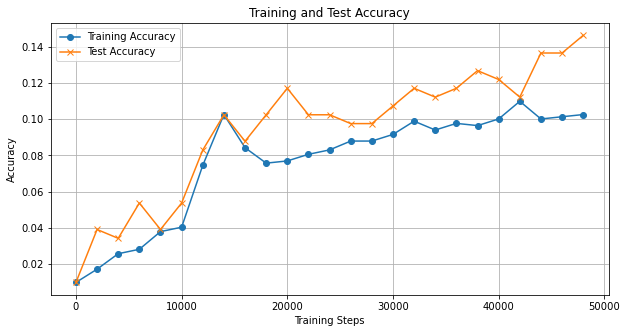

Final test accuracy: 9.85e-01


In [71]:
x_values = range(0, steps, log)

# Plot the training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(x_values[:len(train_accuracies)], train_accuracies, label='Training Accuracy', marker='o')
plt.plot(x_values[:len(test_accuracies)], test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.grid()
plt.show()

# Test the final model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    pred_final_test = model(inputs_test)
    acc_final_test = torch.mean(((pred_final_test - 0.5) * (labels_test - 0.5) > 0).long().float())
    print("Final test accuracy: %.2e" % acc_final_test.cpu().detach().numpy())

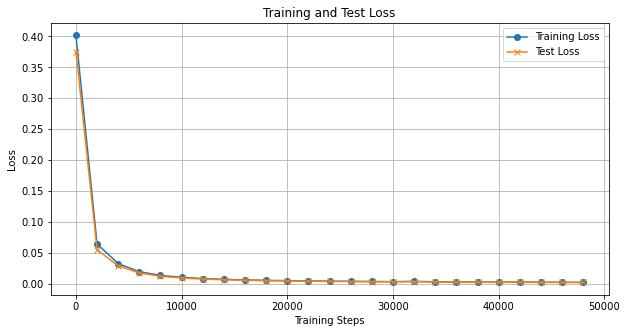

Final test accuracy: 9.85e-01


In [72]:
x_values = range(0, steps, log)

# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(x_values[:len(train_losses)], train_losses, label='Training Loss', marker='o')
plt.plot(x_values[:len(test_losses)], test_losses, label='Test Loss', marker='x')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.grid()
plt.show()

# Test the final model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    pred_final_test = model(inputs_test)
    acc_final_test = torch.mean(((pred_final_test - 0.5) * (labels_test - 0.5) > 0).long().float())
    print("Final test accuracy: %.2e" % acc_final_test.cpu().detach().numpy())

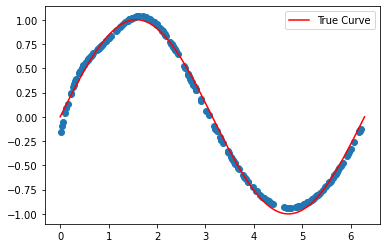

In [73]:
model.eval()
with torch.no_grad():
    pred_final_test = model(inputs_test)
    plt.scatter(inputs_test.detach().numpy().squeeze(),pred_final_test.detach().numpy().squeeze())
    x = np.linspace(0,2*np.pi, 100)
    plt.plot(x, np.sin(x), label="True Curve", color='r')
    plt.legend()
    plt.show()
    

In [68]:
cool_weight_plot(model,0, save_folder="/plots")

In [88]:
from PIL import Image
import glob

# Load heatmap images
heatmap_images = [Image.open(image_path) for image_path in sorted(glob.glob('plots/model_heatmap_*.png'))]

# Save as GIF
heatmap_images[0].save('heatmap_animation.gif', save_all=True, append_images=heatmap_images[1:], duration=200, loop=0)

In [91]:
with torch.no_grad():
    # Assuming you have a PyTorch model called 'model'
    model_state_dict = model.state_dict()
    plot_weights(model_state_dict)

AttributeError: 'collections.OrderedDict' object has no attribute 'params'

In [90]:
def plot_weights(state):
  key_subkey_array = []
  for key, subdict in state.params.items():
    for subkey, array in subdict.items():
      key_subkey_array.append((key, subkey, array))

  zmin = min([np.min(array) for key, subkey, array in key_subkey_array]).item()
  zmax = max([np.max(array) for key, subkey, array in key_subkey_array]).item()
  zval = max(abs(zmin), zmax)*1

  N = len(key_subkey_array)
  grid_size = math.ceil(math.sqrt(N)) # find the nearest square grid

  fig = make_subplots(rows=grid_size, cols=grid_size, subplot_titles=[f"{key} {subkey}" for key, subkey, array in key_subkey_array], vertical_spacing=.1)

  for idx, (key, subkey, array) in enumerate(key_subkey_array):
      row = idx // grid_size + 1  # Calculate the appropriate row, col placement in grid
      col = idx % grid_size + 1
      trace = go.Heatmap(z=array, zmin=zval*-1, zmax=zval*1, zmid=0, colorscale='RdBu', name=f'{key} {subkey}')
      # trace = go.Heatmap(z=array, zmin=zval*-0.1, zmax=zval*0.1, zmid=0, colorscale='RdBu', name=f'{key} {subkey}')
      fig.add_trace(trace, row=row, col=col)

  fig.update_layout(height=400*grid_size, width=400*grid_size)
  fig.show()

In [ ]:
plot_weights(